### Pre-Interview Assessment

### Loading packages

In [1]:
import pandas as pd
import seaborn as sns

### Loading dataset

In [9]:
df = pd.read_csv('/content/logatta.csv')
df.head()

,Age,BusinessTravel,Education,MaritalStatus,OverTime,EmployeeNumber,DailyRate,Gender,accepted for the interview
0,41,Travel_Rarely,2,Single,Yes,1,1102,Female,True
1,49,Travel_Frequently,1,Married,No,2,279,Male,False
2,37,Travel_Rarely,2,Single,Yes,4,1373,Male,False
3,33,Travel_Frequently,4,Married,Yes,5,1392,Female,False
4,27,Travel_Rarely,1,Married,No,7,591,Male,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         1492 non-null   int64 
 1   BusinessTravel              1492 non-null   object
 2   Education                   1492 non-null   int64 
 3   MaritalStatus               1492 non-null   object
 4   OverTime                    1492 non-null   object
 5   EmployeeNumber              1492 non-null   int64 
 6   DailyRate                   1492 non-null   int64 
 7   Gender                      1492 non-null   object
 8   accepted for the interview  1492 non-null   bool  
dtypes: bool(1), int64(4), object(4)
memory usage: 94.8+ KB


In [10]:
df["BusinessTravel"].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [28]:
df.describe()

,Age,BusinessTravel,Education,MaritalStatus,DailyRate,OverTime_No,Gender_Female
count,1.492000e+03,1492.000000,1492.000000,1492.000000,1.492000e+03,1492.000000,1492.000000
mean,2.166870e-16,1.607909,2.916220,1.097855,-9.762819e-17,0.717828,0.401475
std,1.000335e+00,0.665136,1.021738,0.730532,1.000335e+00,0.450207,0.490361
min,-2.075377e+00,0.000000,1.000000,0.000000,-1.994179e+00,0.000000,0.000000
25%,-7.566579e-01,1.000000,2.000000,1.000000,-8.379093e-01,0.000000,0.000000
50%,-9.729827e-02,2.000000,3.000000,1.000000,-1.208752e-03,1.000000,0.000000
75%,6.719547e-01,2.000000,4.000000,2.000000,8.844180e-01,1.000000,1.000000
max,2.540140e+00,2.000000,5.000000,2.000000,1.719261e+00,1.000000,1.000000



Preprocessing the data using OrdinalEncoder and StandardScaler
Visualize the results
Write down observations

In [12]:
from sklearn.preprocessing import OrdinalEncoder
for i in ["BusinessTravel","MaritalStatus"]:
    ordinal =OrdinalEncoder()
    df[[i]]=ordinal.fit_transform(df[[i]])

In [13]:
for i in ["OverTime","Gender"]:
    x=pd.get_dummies(df[[i]])
    x=x.drop(x.columns[-1],axis=1)
    df=pd.concat([df,x],axis=1)
    df=df.drop(i,axis=1)

In [14]:
from sklearn.preprocessing import StandardScaler
for i  in ["DailyRate","Age"] :
    std =StandardScaler()
    df[[i]]=std.fit_transform(df[[i]])

In [15]:
df=df.drop(["EmployeeNumber"],axis=1)

Visualize the results

<Axes: >

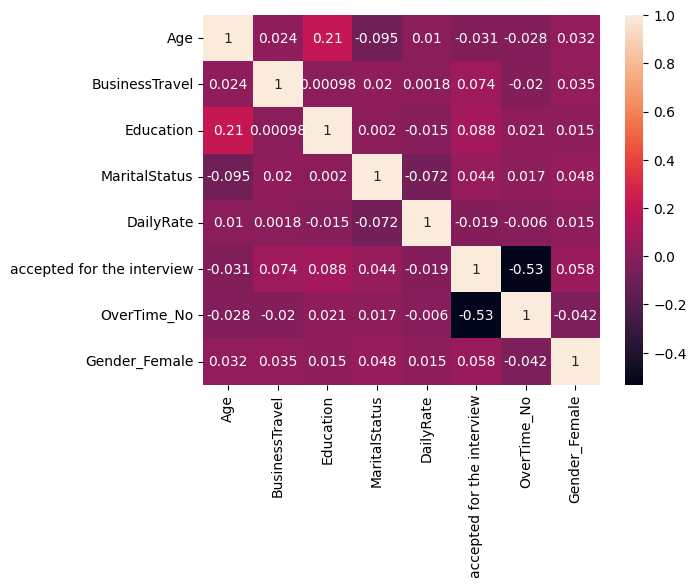

In [16]:
sns.heatmap(df.corr() ,annot=True)

Accepted for the interview column is mostly correlated with Education, Business travel, Gender and MaritalStatus columns. It means that these columns have the biggest impact on whether the candidate was accepted or not.

For prediction use three classification methods (Regression, Naive Bayes and KNN)

Split the data

In [17]:
y=df['accepted for the interview']
X=df.drop(['accepted for the interview'],axis=1)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,random_state=42)

Train each of the model

Test all the models on given examples and save the results (use model.score() function for counting the accuracy and model.predict()  function to make a prediction for given feature set)

### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.92      0.98      0.95       402
        True       0.63      0.26      0.37        46

    accuracy                           0.91       448
   macro avg       0.78      0.62      0.66       448
weighted avg       0.89      0.91      0.89       448



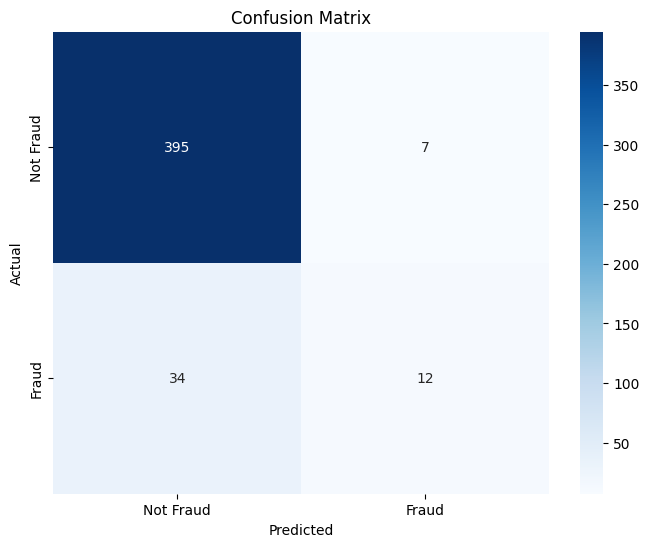

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_pred2 = model.predict(X_test)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

       False       0.99      0.88      0.93       402
        True       0.47      0.96      0.63        46

    accuracy                           0.88       448
   macro avg       0.73      0.92      0.78       448
weighted avg       0.94      0.88      0.90       448



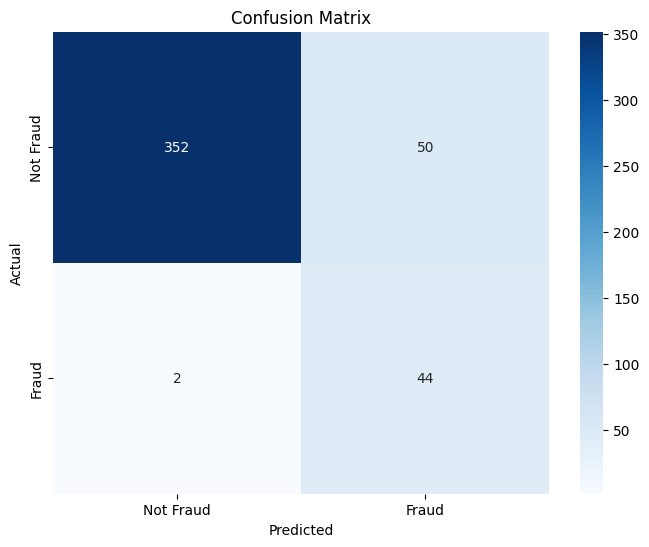

In [26]:
cm = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### KNeighbors

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

       False       0.97      1.00      0.98       402
        True       0.97      0.72      0.82        46

    accuracy                           0.97       448
   macro avg       0.97      0.86      0.90       448
weighted avg       0.97      0.97      0.97       448



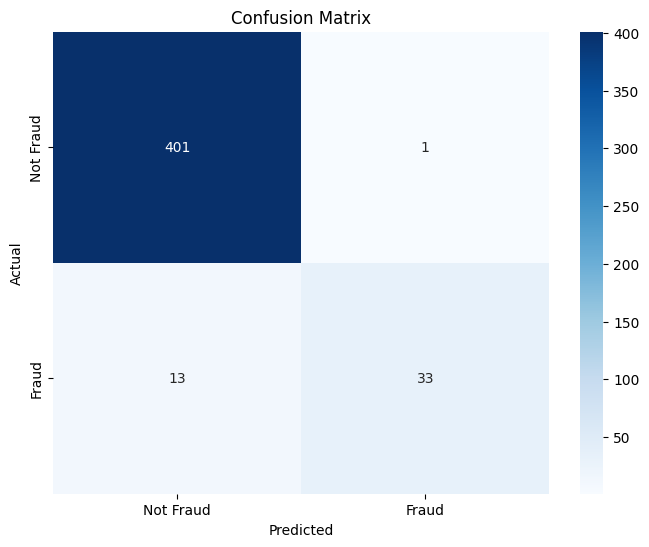

In [27]:
cm = confusion_matrix(y_test, y_pred3)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()